# MediaPipeによるスケルトン(人間の骨格特徴)の自動抽出・トラッキング
- https://mediapipe.dev/

## MediaPipeのインストール

In [1]:
%%capture
!pip install mediapipe

- ここで**セッションの再起動**をすること

## 画像ファイルからスケルトン(人間の骨格特徴)を取り出す

In [2]:
# 初期設定
import mediapipe as mp
mp_holistic = mp.solutions.holistic

# Initialize MediaPipe Holistic.
holistic = mp_holistic.Holistic(
    static_image_mode=True, min_detection_confidence=0.5)

# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 画像の指定
# 元画像
input_imgpath = '/content/drive/MyDrive/ユニークAIシステム構築道場/MediaPipe/takafuminakanishi.jpg'

# スケルトン付き画像保存先
output_imgpath = '/content/drive/MyDrive/ユニークAIシステム構築道場/MediaPipe/takafuminakanishi_with_skeleton.jpg'

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

image = cv2.imread(input_imgpath)
img_RGB=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Convert the BGR image to RGB and process it with MediaPipe Pose.
results = holistic.process(img_RGB)

# Draw pose landmarks.
annotated_image = image.copy()
mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
mp_drawing.draw_landmarks(
      image=annotated_image,
      landmark_list=results.face_landmarks,
      connections=mp_holistic.FACEMESH_TESSELATION,
      landmark_drawing_spec=drawing_spec,
      connection_drawing_spec=drawing_spec)
mp_drawing.draw_landmarks(
      image=annotated_image,
      landmark_list=results.pose_landmarks,
      connections=mp_holistic.POSE_CONNECTIONS,
      landmark_drawing_spec=drawing_spec,
      connection_drawing_spec=drawing_spec)
cv2.imwrite(output_imgpath, annotated_image)

True

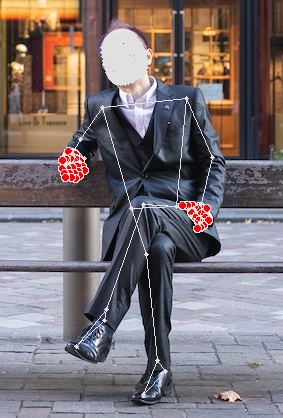

In [6]:
# スケルトン付き画像表示
from IPython.display import Image
Image(output_imgpath, format='jpg')

In [7]:
# 画像から21個の3D左手ランドマークを抽出
len(results.left_hand_landmarks.landmark)

21

In [8]:
results.left_hand_landmarks.landmark

[x: 0.730967343
y: 0.498017371
z: 2.5505511e-09
, x: 0.706637621
y: 0.492861241
z: -0.00532250106
, x: 0.681656897
y: 0.49158892
z: -0.0126171317
, x: 0.66204375
y: 0.491570145
z: -0.0202880353
, x: 0.644447803
y: 0.490546733
z: -0.0278952718
, x: 0.697484434
y: 0.499580622
z: -0.0134282541
, x: 0.681791
y: 0.50676626
z: -0.0220257565
, x: 0.67798835
y: 0.50845176
z: -0.0263587
, x: 0.677681148
y: 0.509095311
z: -0.0279006045
, x: 0.712470412
y: 0.510121047
z: -0.0138986874
, x: 0.692402959
y: 0.519396067
z: -0.0195093434
, x: 0.689743936
y: 0.52103436
z: -0.0202158988
, x: 0.691054881
y: 0.520511866
z: -0.0208030045
, x: 0.725231051
y: 0.519580603
z: -0.0145218112
, x: 0.706806421
y: 0.52951473
z: -0.0194079075
, x: 0.702898443
y: 0.529910505
z: -0.0192710068
, x: 0.702445567
y: 0.528679788
z: -0.0186681207
, x: 0.735263348
y: 0.527849853
z: -0.015482354
, x: 0.719947517
y: 0.539181232
z: -0.0178752653
, x: 0.70811075
y: 0.543962598
z: -0.0168531649
, x: 0.698170125
y: 0.545767486
z: 

In [9]:
results.left_hand_landmarks.landmark[0].x

0.7309673428535461

In [10]:
# 画像から21個の3D右手ランドマークを抽出
len(results.right_hand_landmarks.landmark)

21

In [11]:
results.right_hand_landmarks.landmark

[x: 0.243108287
y: 0.363299251
z: 4.39666969e-09
, x: 0.26620394
y: 0.368868381
z: -0.00821089931
, x: 0.283590555
y: 0.38332361
z: -0.0149432067
, x: 0.290286154
y: 0.397198498
z: -0.0198045187
, x: 0.297779381
y: 0.408725888
z: -0.0247464571
, x: 0.26850903
y: 0.378924221
z: -0.0263551623
, x: 0.274529397
y: 0.396768779
z: -0.0375182107
, x: 0.277986199
y: 0.409332842
z: -0.0423483066
, x: 0.279908031
y: 0.419657
z: -0.0449401848
, x: 0.250321776
y: 0.3796767
z: -0.0273569115
, x: 0.257810116
y: 0.400084078
z: -0.0378104821
, x: 0.263336957
y: 0.414504349
z: -0.0415659547
, x: 0.267846495
y: 0.426451176
z: -0.0442848355
, x: 0.234286219
y: 0.381182373
z: -0.0280979723
, x: 0.239867657
y: 0.402489483
z: -0.0385072157
, x: 0.245001942
y: 0.415558338
z: -0.0418494232
, x: 0.251499534
y: 0.425495625
z: -0.0430597775
, x: 0.219792515
y: 0.383511871
z: -0.0288794525
, x: 0.222370639
y: 0.40221262
z: -0.0385393873
, x: 0.2263138
y: 0.414590359
z: -0.0421122573
, x: 0.232022136
y: 0.42436561

In [12]:
# 画像から468個の3D顔ランドマークを抽出
len(results.face_landmarks.landmark)

468

In [13]:
results.face_landmarks.landmark

[x: 0.435541
y: 0.157308906
z: -0.0237081274
, x: 0.427258611
y: 0.142393455
z: -0.031301681
, x: 0.431964606
y: 0.148697034
z: -0.0198042672
, x: 0.418367833
y: 0.130441576
z: -0.0174233671
, x: 0.425091118
y: 0.137660965
z: -0.0317552388
, x: 0.423433185
y: 0.132428885
z: -0.0273832604
, x: 0.420664817
y: 0.121028289
z: -0.00583751174
, x: 0.385509372
y: 0.133085266
z: 0.0226866063
, x: 0.417493671
y: 0.111732513
z: 0.00238476438
, x: 0.414929509
y: 0.105780073
z: 0.00408255
, x: 0.40736863
y: 0.0853964388
z: 0.0199825279
, x: 0.436524659
y: 0.159369975
z: -0.0236611031
, x: 0.437546045
y: 0.161198348
z: -0.02239432
, x: 0.438268572
y: 0.162075758
z: -0.0203972533
, x: 0.438239574
y: 0.162842453
z: -0.0214177202
, x: 0.438502938
y: 0.164043069
z: -0.023087671
, x: 0.439190626
y: 0.165951252
z: -0.0255214144
, x: 0.440302968
y: 0.168525159
z: -0.0264708661
, x: 0.443501
y: 0.174742222
z: -0.0238395259
, x: 0.429210484
y: 0.145346731
z: -0.0292001944
, x: 0.425629109
y: 0.147192299
z: 

In [14]:
# 画像から33個の3D全身ランドマークを抽出
len(results.pose_landmarks.landmark)

33

In [15]:
results.pose_landmarks.landmark

[x: 0.431540817
y: 0.148497045
z: -0.26210773
visibility: 0.999999762
, x: 0.447054118
y: 0.12735191
z: -0.22059156
visibility: 0.999999523
, x: 0.460925311
y: 0.125656664
z: -0.220401511
visibility: 0.999999642
, x: 0.473751426
y: 0.124306381
z: -0.220414862
visibility: 0.999999642
, x: 0.414812475
y: 0.133139223
z: -0.202903748
visibility: 0.999999404
, x: 0.405306518
y: 0.135480732
z: -0.202978209
visibility: 0.999999404
, x: 0.398108184
y: 0.137739927
z: -0.203100353
visibility: 0.999999404
, x: 0.501185954
y: 0.135382
z: 0.0178635
visibility: 0.999999523
, x: 0.399462819
y: 0.151385367
z: 0.0921530798
visibility: 0.999997735
, x: 0.467304349
y: 0.168667078
z: -0.174614653
visibility: 0.999999881
, x: 0.421763182
y: 0.174393535
z: -0.153247193
visibility: 0.999999642
, x: 0.659386039
y: 0.235727191
z: 0.0922244
visibility: 0.999985814
, x: 0.362087965
y: 0.256056875
z: 0.202545777
visibility: 0.999976873
, x: 0.752383351
y: 0.375705093
z: -0.0115086781
visibility: 0.994603217
, x: 

## とにかくスケルトン付きのgifファイルを作る

In [16]:
# 初期設定
import mediapipe as mp
mp_holistic = mp.solutions.holistic

# Initialize MediaPipe Holistic.
holistic = mp_holistic.Holistic(
    static_image_mode=True, min_detection_confidence=0.5)

# Prepare DrawingSpec for drawing the face landmarks later.
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

In [17]:
# ビデオの指定
videopath = '/content/drive/MyDrive/ユニークAIシステム構築道場/MediaPipe/testmovie.m4v'

In [18]:
# ビデオから１フレームごとの画像を展開するフォルダ
TMPFILEPATH='/content/drive/MyDrive/ユニークAIシステム構築道場/MediaPipe/tmpimages/'

In [19]:
# video2images
import os
import shutil
import cv2

def video_2_images(video_file):

  tmpfilepath=TMPFILEPATH
  print(tmpfilepath)
  image_file='img_%s.png'
  # 既にimagesフォルダーがあれば削除
  if os.path.isdir(tmpfilepath):
    shutil.rmtree(tmpfilepath)

  os.makedirs(tmpfilepath, exist_ok=True)
  print(os.path.isdir(tmpfilepath))

  # Initial setting
  i = 0
  interval = 3
  length = 300

  cap = cv2.VideoCapture(video_file)
  while(cap.isOpened()):
    flag, frame = cap.read()
    if flag == False:
      break
    if i == length*interval:
      break
    if i % interval == 0:
      cv2.imwrite(tmpfilepath+image_file % str(i).zfill(6), frame)
    i += 1
  cap.release()

In [20]:
video_2_images(videopath)

/content/drive/MyDrive/ユニークAIシステム構築道場/MediaPipe/tmpimages/
True


In [21]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import glob

# image file names to files in list format
files=[]
for name in sorted(glob.glob(TMPFILEPATH+'*.png')):
    files.append(name)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in files}

for name, image in images.items():
  # Convert the BGR image to RGB and process it with MediaPipe Pose.
  results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  # Draw pose landmarks.
  annotated_image = image.copy()
  mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
  mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
  mp_drawing.draw_landmarks(
      image=annotated_image,
      landmark_list=results.face_landmarks,
      connections=mp_holistic.FACEMESH_TESSELATION,
      landmark_drawing_spec=drawing_spec,
      connection_drawing_spec=drawing_spec)
  mp_drawing.draw_landmarks(
      image=annotated_image,
      landmark_list=results.pose_landmarks,
      connections=mp_holistic.POSE_CONNECTIONS,
      landmark_drawing_spec=drawing_spec,
      connection_drawing_spec=drawing_spec)
  cv2.imwrite(name, annotated_image)

In [22]:
# images2gif
from PIL import Image
import glob

outgif='/content/drive/MyDrive/ユニークAIシステム構築道場/MediaPipe/out.gif'

files = sorted(glob.glob(TMPFILEPATH+'*.png'))
images = list(map(lambda file: Image.open(file), files))
images[0].save(outgif, save_all=True,
               append_images=images[1:],
               duration=100, loop=0)

In [23]:
# display gif
from IPython.display import Image
Image(outgif, format='png')

Output hidden; open in https://colab.research.google.com to view.

# もっと簡単な書き方

In [24]:
import cv2
import mediapipe as mp
import csv

# MediaPipe の各種ユーティリティ
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

def process_video(input_video_path, output_video_path, csv_path):
    """
    input_video_path: 入力動画ファイルのパス
    output_video_path: スケルトン描画後の動画ファイル出力パス
    csv_path: ランドマークデータを保存する CSV ファイルパス
    """

    # ----- 1) 動画ファイルの読み込み -----
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print(f"動画を開けませんでした: {input_video_path}")
        return

    # 動画情報の取得
    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps    = cap.get(cv2.CAP_PROP_FPS)

    # ----- 2) 出力動画ファイルの設定 -----
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # mp4出力用
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    # ----- 3) CSVファイルを開き、ヘッダを書き込む -----
    # ここでは frame, type(顔/ポーズ/手など), landmark_index, x, y, z, visibility の例
    csv_file = open(csv_path, 'w', newline='')
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['frame', 'landmark_type', 'index', 'x', 'y', 'z', 'visibility'])

    # ----- 4) MediaPipe Holistic のインスタンスを作成 -----
    with mp_holistic.Holistic(
        static_image_mode=False,
        model_complexity=1,
        smooth_landmarks=True,
        enable_segmentation=False,
        smooth_segmentation=True,
        refine_face_landmarks=True
    ) as holistic:

        frame_idx = 0  # フレーム番号

        while True:
            ret, frame = cap.read()
            if not ret:
                break  # 動画を最後まで読み込んだので終了

            # BGR -> RGB 変換
            img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # ----- 5) フレームを Holistic で推論 -----
            results = holistic.process(img_rgb)

            # ----- 6) ランドマーク情報を CSV に書き込み -----
            # 顔 (face_landmarks)
            if results.face_landmarks is not None:
                for idx, landmark in enumerate(results.face_landmarks.landmark):
                    csv_writer.writerow([
                        frame_idx,
                        'face',
                        idx,
                        landmark.x,
                        landmark.y,
                        landmark.z,
                        landmark.visibility
                    ])

            # ポーズ (pose_landmarks)
            if results.pose_landmarks is not None:
                for idx, landmark in enumerate(results.pose_landmarks.landmark):
                    csv_writer.writerow([
                        frame_idx,
                        'pose',
                        idx,
                        landmark.x,
                        landmark.y,
                        landmark.z,
                        landmark.visibility
                    ])

            # 左手 (left_hand_landmarks)
            if results.left_hand_landmarks is not None:
                for idx, landmark in enumerate(results.left_hand_landmarks.landmark):
                    csv_writer.writerow([
                        frame_idx,
                        'left_hand',
                        idx,
                        landmark.x,
                        landmark.y,
                        landmark.z,
                        landmark.visibility
                    ])

            # 右手 (right_hand_landmarks)
            if results.right_hand_landmarks is not None:
                for idx, landmark in enumerate(results.right_hand_landmarks.landmark):
                    csv_writer.writerow([
                        frame_idx,
                        'right_hand',
                        idx,
                        landmark.x,
                        landmark.y,
                        landmark.z,
                        landmark.visibility
                    ])

            # ----- 7) スケルトン描画 -----
            annotated_frame = frame.copy()

            # 顔
            if results.face_landmarks:
                mp_drawing.draw_landmarks(
                    image=annotated_frame,
                    landmark_list=results.face_landmarks,
                    connections=mp_holistic.FACEMESH_TESSELATION,  # 複数あるがテッセレーションなどを例示
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,256,121), thickness=1)
                )

            # ポーズ
            if results.pose_landmarks:
                mp_drawing.draw_landmarks(
                    image=annotated_frame,
                    landmark_list=results.pose_landmarks,
                    connections=mp_holistic.POSE_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(80,44,121), thickness=2)
                )

            # 左手
            if results.left_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image=annotated_frame,
                    landmark_list=results.left_hand_landmarks,
                    connections=mp_holistic.HAND_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(121,44,250), thickness=2)
                )

            # 右手
            if results.right_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image=annotated_frame,
                    landmark_list=results.right_hand_landmarks,
                    connections=mp_holistic.HAND_CONNECTIONS,
                    landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(245,66,230), thickness=2)
                )

            # ----- 8) フレームを動画として書き出し -----
            out.write(annotated_frame)

            frame_idx += 1  # 次のフレームへ

        # Holistic インスタンス終了
    # CSVファイルを閉じる
    csv_file.close()
    # キャプチャと動画ライターを閉じる
    cap.release()
    out.release()
    print("処理が完了しました。")

# -----------------------------
#  実行例 (Colab またはローカル)
# -----------------------------
input_video_path = '/content/drive/MyDrive/ユニークAIシステム構築道場/MediaPipe/testmovie.m4v'   # 入力動画
output_video_path = '/content/drive/MyDrive/ユニークAIシステム構築道場/MediaPipe/resultmovie.mp4' # スケルトン付き出力動画
csv_path = '/content/drive/MyDrive/ユニークAIシステム構築道場/MediaPipe/landmark.csv'              # ランドマークCSV

process_video(input_video_path, output_video_path, csv_path)


処理が完了しました。


- resultmovie.mp4とlandmark.csvが生成されているはず

# ジャンケン(グー(👊)、チョキ(✌️)、パー（✋）)を認識する機能を実現

- [注意]なるべくシンプルになるようにプログラムしているので、両手が写ると不具合があるかもしれません。データを作成する際は、右手のみ写るように写真を準備してください。

## 手のLandmarkを取得する


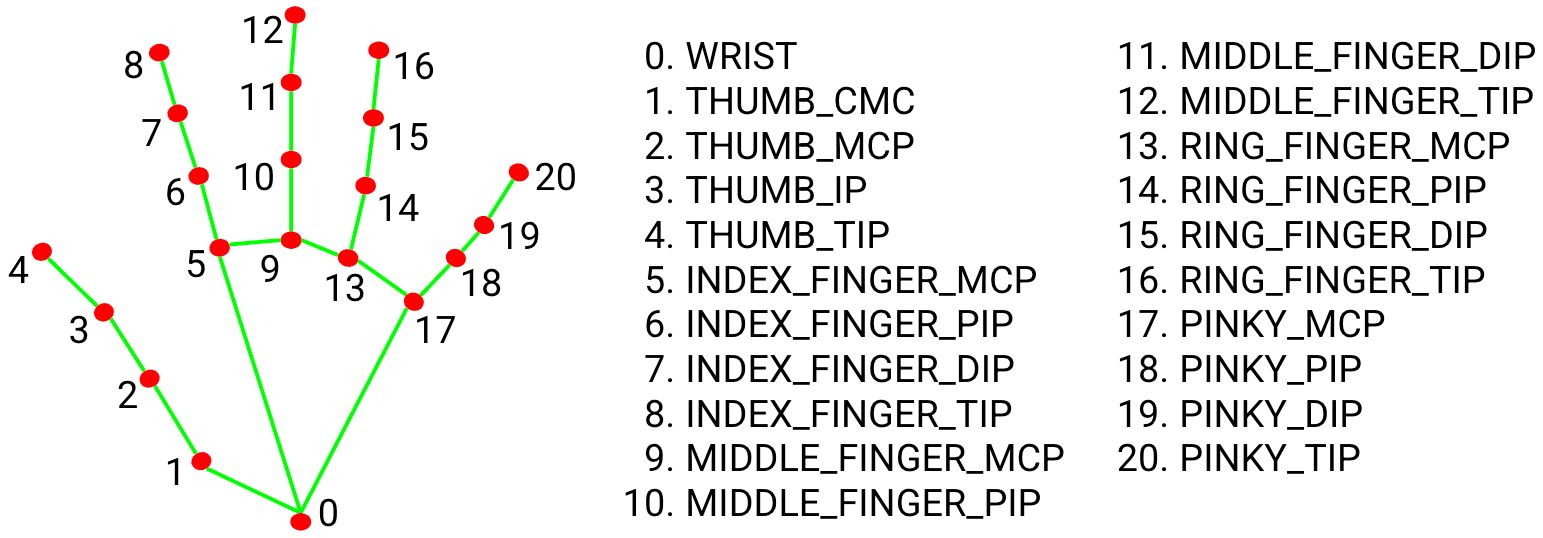

- https://google.github.io/mediapipe/solutions/hands.html より

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import cv2
import mediapipe as mp

input_filename='/content/drive/MyDrive/ユニークAIシステム構築道場/MediaPipe/papar.jpg'
output_filename='/content/drive/MyDrive/ユニークAIシステム構築道場/MediaPipe/tmp.jpg'

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
holistic=mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5)


image = cv2.imread(input_filename)
# 処理する前にBGR画像をRGBに変換
result = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

image_height, image_width, _ = image.shape
annotated_image = image.copy()
mp_drawing.draw_landmarks(annotated_image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
cv2.imwrite(output_filename, annotated_image)

True

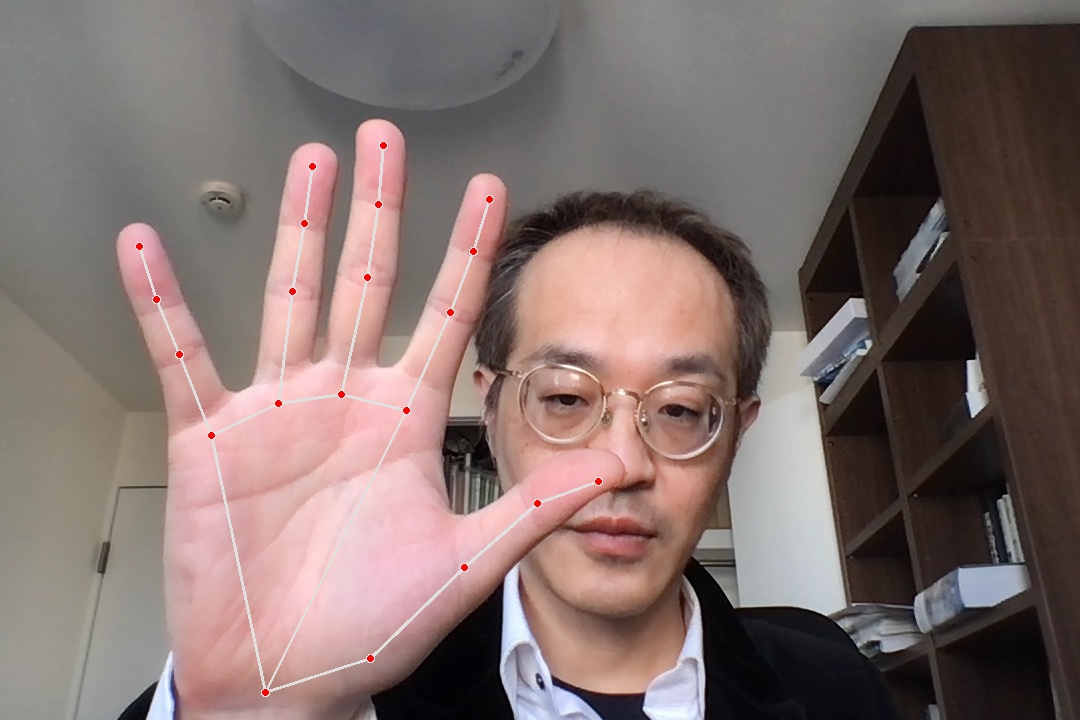

In [27]:
# スケルトン付き画像表示
from IPython.display import Image
Image(output_filename, format='jpg')

In [28]:
mp_hands = mp.solutions.hands  # これを追加
print('hand_landmarks:', result.right_hand_landmarks)
print(
      f'Index finger tip coordinates: (',
      f'{result.right_hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
      f'{result.right_hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )

hand_landmarks: landmark {
  x: 0.245538309
  y: 0.961713612
  z: 5.890343e-07
}
landmark {
  x: 0.34307158
  y: 0.915135086
  z: -0.0340473056
}
landmark {
  x: 0.430358499
  y: 0.787868
  z: -0.0420309156
}
landmark {
  x: 0.497252882
  y: 0.699499667
  z: -0.0493926257
}
landmark {
  x: 0.554492712
  y: 0.668266058
  z: -0.05646291
}
landmark {
  x: 0.376048356
  y: 0.569912732
  z: -0.0107206861
}
landmark {
  x: 0.416749477
  y: 0.433773
  z: -0.0249445364
}
landmark {
  x: 0.438091755
  y: 0.349709332
  z: -0.0414035656
}
landmark {
  x: 0.453092158
  y: 0.277249694
  z: -0.0563129745
}
landmark {
  x: 0.316041052
  y: 0.547311902
  z: -0.0154607603
}
landmark {
  x: 0.340113193
  y: 0.385128349
  z: -0.0276182536
}
landmark {
  x: 0.350525409
  y: 0.284544736
  z: -0.0449295081
}
landmark {
  x: 0.355396628
  y: 0.202229261
  z: -0.0593114309
}
landmark {
  x: 0.25762248
  y: 0.560175121
  z: -0.0263336841
}
landmark {
  x: 0.271164775
  y: 0.40523082
  z: -0.046152249
}
landmar

In [29]:
len(result.right_hand_landmarks.landmark)

21

In [30]:
result.right_hand_landmarks.landmark[1].x

0.3430715799331665

In [31]:
import numpy as np
handpose=np.array([])

for tmp in result.right_hand_landmarks.landmark:
# handposeに21個のx,y,zの値(合計63個の特徴量からなる63次元ベクトルを格納)
  handpose=np.append(handpose,tmp.x)
  handpose=np.append(handpose,tmp.y)
  handpose=np.append(handpose,tmp.z)

In [32]:
handpose.shape

(63,)

In [33]:
handpose

array([ 2.45538309e-01,  9.61713612e-01,  5.89034300e-07,  3.43071580e-01,
        9.15135086e-01, -3.40473056e-02,  4.30358499e-01,  7.87868023e-01,
       -4.20309156e-02,  4.97252882e-01,  6.99499667e-01, -4.93926257e-02,
        5.54492712e-01,  6.68266058e-01, -5.64629100e-02,  3.76048356e-01,
        5.69912732e-01, -1.07206861e-02,  4.16749477e-01,  4.33773011e-01,
       -2.49445364e-02,  4.38091755e-01,  3.49709332e-01, -4.14035656e-02,
        4.53092158e-01,  2.77249694e-01, -5.63129745e-02,  3.16041052e-01,
        5.47311902e-01, -1.54607603e-02,  3.40113193e-01,  3.85128349e-01,
       -2.76182536e-02,  3.50525409e-01,  2.84544736e-01, -4.49295081e-02,
        3.55396628e-01,  2.02229261e-01, -5.93114309e-02,  2.57622480e-01,
        5.60175121e-01, -2.63336841e-02,  2.71164775e-01,  4.05230820e-01,
       -4.61522490e-02,  2.82096654e-01,  3.10707450e-01, -6.81907460e-02,
        2.89411724e-01,  2.31443912e-01, -8.45346972e-02,  1.95643485e-01,
        6.04778945e-01, -

## ジャンケン(グー(👊)、チョキ(✌️)、パー（✋）)の訓練データを読み込みデータ化
- 訓練データは'/content/drive/MyDrive/Colab Notebooks/SummerSeminars/MediaPipe/imgdata'に格納していることとする。


In [34]:
import cv2
import mediapipe as mp
import numpy as np
import os

# データが格納されたディレクトリ名
basedir='/content/drive/MyDrive/ユニークAIシステム構築道場/MediaPipe/trainimgdata'

# 格納するデータをつくる
features_list = np.array([])
label_list = np.array([])
filename_list =np.array([])

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
holistic=mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5)


for dir in os.listdir(basedir):
  if dir == ".DS_Store":
    continue

  dir1 = basedir + '/' + dir
  label = dir

  for file in os.listdir(dir1):
    if file != ".DS_Store":
      label_list=np.append(label_list, label)
      filepath = dir1 + '/' + file

      filename_list=np.append(filename_list,dir+'/'+file)
#      print(filepath)

      image = cv2.imread(filepath)
      result = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      handpose=np.array([])
      for tmp in result.right_hand_landmarks.landmark:
        handpose=np.append(handpose,tmp.x)
        handpose=np.append(handpose,tmp.y)
        handpose=np.append(handpose,tmp.z)
#    print(features_list.reshape(-1,63))
#    print('---------')
    features_list=np.append(features_list,handpose)
  features_list=features_list.reshape(-1,63)

In [35]:
features_list.shape

(15, 63)

In [36]:
label_list.shape

(15,)

In [37]:
filename_list

array(['scissors/001.jpg', 'scissors/002.jpg', 'scissors/003.jpg',
       'scissors/004.jpg', 'scissors/005.jpg', 'paper/001.jpg',
       'paper/002.jpg', 'paper/003.jpg', 'paper/004.jpg', 'paper/005.jpg',
       'rock/001.jpg', 'rock/005.jpg', 'rock/002.jpg', 'rock/003.jpg',
       'rock/004.jpg'], dtype='<U32')

In [38]:
# 列の名前
col_names=['wrist_x','wrist_y','wrist_z',
           'thumn_cmc_x','thumn_cmc_y','thumn_cmc_z',
           'thmb_mcp_x','thmb_mcp_y','thmb_mcp_z',
           'thumb_ip_x','thumb_ip_y','thumb_ip_z',
           'thumb_tip_x','thumb_tip_y','thumb_tip_z',
           'index_finger_cmc_x','index_finger_cmc_y','index_finger_cmc_z',
           'index_finger_mcp_x','index_finger_mcp_y','index_finger_mcp_z',
           'index_finger_ip_x','index_finger_ip_y','index_finger_ip_z',
           'index_finger_tip_x','index_finger_tip_y','index_finger_tip_z',
           'middle_finger_cmc_x','middle_finger_cmc_y','middle_finger_cmc_z',
           'middle_finger_mcp_x','middle_finger_mcp_y','middle_finger_mcp_z',
           'middle_finger_ip_x','middle_finger_ip_y','middle_finger_ip_z',
           'middle_finger_tip_x','middle_finger_tip_y','middle_finger_tip_z',
           'ring_finger_cmc_x','ring_finger_cmc_y','ring_finger_cmc_z',
           'ring_finger_mcp_x','ring_finger_mcp_y','ring_finger_mcp_z',
           'ring_finger_ip_x','ring_finger_ip_y','ring_finger_ip_z',
           'ring_finger_tip_x','ring_finger_tip_y','ring_finger_tip_z',
           'pinky_cmc_x','pinky_cmc_y','pinky_cmc_z',
           'pinky_mcp_x','pinky_mcp_y','pinky_mcp_z',
           'pinky_ip_x','pinky_ip_y','pinky_ip_z',
           'pinky_tip_x','pinky_tip_y','pinky_tip_z']

In [39]:
import pandas as pd
df = pd.DataFrame(data=features_list, index=filename_list, columns=col_names)
df['name']=label_list
df

,wrist_x,wrist_y,wrist_z,thumn_cmc_x,thumn_cmc_y,thumn_cmc_z,thmb_mcp_x,thmb_mcp_y,thmb_mcp_z,thumb_ip_x,...,pinky_mcp_x,pinky_mcp_y,pinky_mcp_z,pinky_ip_x,pinky_ip_y,pinky_ip_z,pinky_tip_x,pinky_tip_y,pinky_tip_z,name
scissors/001.jpg,0.199554,0.982634,8.317177e-07,0.244425,0.921489,-0.046248,0.244507,0.816199,-0.064505,0.193605,...,0.094870,0.698053,-0.080364,0.112875,0.752954,-0.081225,0.126978,0.801482,-0.069578,scissors
scissors/002.jpg,0.174357,0.928374,6.091428e-07,0.124686,0.816018,0.015004,0.126398,0.683091,-0.004686,0.171263,...,0.314792,0.603766,-0.132989,0.311819,0.632101,-0.093363,0.298552,0.671743,-0.062823,scissors
scissors/003.jpg,0.235558,0.865946,1.136633e-06,0.300615,0.872885,-0.063710,0.333306,0.839061,-0.105014,0.282049,...,0.140739,0.763176,-0.158366,0.172039,0.865168,-0.159298,0.201552,0.926957,-0.141756,scissors
scissors/004.jpg,0.193691,0.948379,1.577206e-06,0.246222,0.933522,-0.107386,0.243646,0.841204,-0.152225,0.175340,...,0.090678,0.643803,-0.126827,0.085396,0.729231,-0.147115,0.089713,0.798172,-0.142414,scissors
scissors/005.jpg,0.224607,0.919573,6.331022e-07,0.272278,0.839025,-0.023790,0.302870,0.724310,-0.040154,0.300580,...,0.168778,0.639663,-0.116790,0.213513,0.690615,-0.116784,0.240448,0.737050,-0.106864,scissors
paper/001.jpg,0.202852,0.888683,8.998642e-07,0.290910,0.835502,-0.038619,0.358089,0.735546,-0.058866,0.411856,...,0.081057,0.494671,-0.082776,0.051885,0.430046,-0.099552,0.027294,0.362979,-0.110335,paper
paper/002.jpg,0.212951,0.817406,4.032768e-07,0.159213,0.709577,-0.007499,0.125283,0.585657,-0.018478,0.111278,...,0.407522,0.523971,-0.109362,0.445380,0.470639,-0.123606,0.479290,0.420416,-0.130891,paper
paper/003.jpg,0.232080,0.839329,4.887708e-07,0.302757,0.778105,-0.022694,0.349816,0.654464,-0.033172,0.388839,...,0.145070,0.513228,-0.123486,0.120252,0.452273,-0.146465,0.096118,0.390583,-0.161567,paper
paper/004.jpg,0.241384,0.882269,7.457184e-07,0.332039,0.830558,-0.042416,0.399648,0.725388,-0.065860,0.454616,...,0.105192,0.529525,-0.142812,0.065310,0.468367,-0.169193,0.031933,0.402663,-0.185975,paper
paper/005.jpg,0.204652,0.896030,1.029114e-06,0.287770,0.872059,-0.083200,0.359353,0.805234,-0.130274,0.423602,...,0.079504,0.459916,-0.139846,0.048259,0.380614,-0.167544,0.023429,0.299899,-0.184830,paper


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['name'].values)
df['label']=label
df

,wrist_x,wrist_y,wrist_z,thumn_cmc_x,thumn_cmc_y,thumn_cmc_z,thmb_mcp_x,thmb_mcp_y,thmb_mcp_z,thumb_ip_x,...,pinky_mcp_y,pinky_mcp_z,pinky_ip_x,pinky_ip_y,pinky_ip_z,pinky_tip_x,pinky_tip_y,pinky_tip_z,name,label
scissors/001.jpg,0.199554,0.982634,8.317177e-07,0.244425,0.921489,-0.046248,0.244507,0.816199,-0.064505,0.193605,...,0.698053,-0.080364,0.112875,0.752954,-0.081225,0.126978,0.801482,-0.069578,scissors,2
scissors/002.jpg,0.174357,0.928374,6.091428e-07,0.124686,0.816018,0.015004,0.126398,0.683091,-0.004686,0.171263,...,0.603766,-0.132989,0.311819,0.632101,-0.093363,0.298552,0.671743,-0.062823,scissors,2
scissors/003.jpg,0.235558,0.865946,1.136633e-06,0.300615,0.872885,-0.063710,0.333306,0.839061,-0.105014,0.282049,...,0.763176,-0.158366,0.172039,0.865168,-0.159298,0.201552,0.926957,-0.141756,scissors,2
scissors/004.jpg,0.193691,0.948379,1.577206e-06,0.246222,0.933522,-0.107386,0.243646,0.841204,-0.152225,0.175340,...,0.643803,-0.126827,0.085396,0.729231,-0.147115,0.089713,0.798172,-0.142414,scissors,2
scissors/005.jpg,0.224607,0.919573,6.331022e-07,0.272278,0.839025,-0.023790,0.302870,0.724310,-0.040154,0.300580,...,0.639663,-0.116790,0.213513,0.690615,-0.116784,0.240448,0.737050,-0.106864,scissors,2
paper/001.jpg,0.202852,0.888683,8.998642e-07,0.290910,0.835502,-0.038619,0.358089,0.735546,-0.058866,0.411856,...,0.494671,-0.082776,0.051885,0.430046,-0.099552,0.027294,0.362979,-0.110335,paper,0
paper/002.jpg,0.212951,0.817406,4.032768e-07,0.159213,0.709577,-0.007499,0.125283,0.585657,-0.018478,0.111278,...,0.523971,-0.109362,0.445380,0.470639,-0.123606,0.479290,0.420416,-0.130891,paper,0
paper/003.jpg,0.232080,0.839329,4.887708e-07,0.302757,0.778105,-0.022694,0.349816,0.654464,-0.033172,0.388839,...,0.513228,-0.123486,0.120252,0.452273,-0.146465,0.096118,0.390583,-0.161567,paper,0
paper/004.jpg,0.241384,0.882269,7.457184e-07,0.332039,0.830558,-0.042416,0.399648,0.725388,-0.065860,0.454616,...,0.529525,-0.142812,0.065310,0.468367,-0.169193,0.031933,0.402663,-0.185975,paper,0
paper/005.jpg,0.204652,0.896030,1.029114e-06,0.287770,0.872059,-0.083200,0.359353,0.805234,-0.130274,0.423602,...,0.459916,-0.139846,0.048259,0.380614,-0.167544,0.023429,0.299899,-0.184830,paper,0


In [41]:
X=df.loc[:, 'wrist_x': 'pinky_tip_z'].values
y=df.loc[:, 'label'].values

In [42]:
X.shape

(15, 63)

In [43]:
y

array([2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [44]:
# サポートベクターマシン(SVM)で試してみる
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model=SVC()

# fitで学習
model.fit(X, y)

#predictで予測
y_pred=model.predict(X)

# 正解率を計算
accuracy_score(y_pred, y)

1.0

Saving papar.jpg to papar.jpg
----------------------------------
Recognition Result
paper


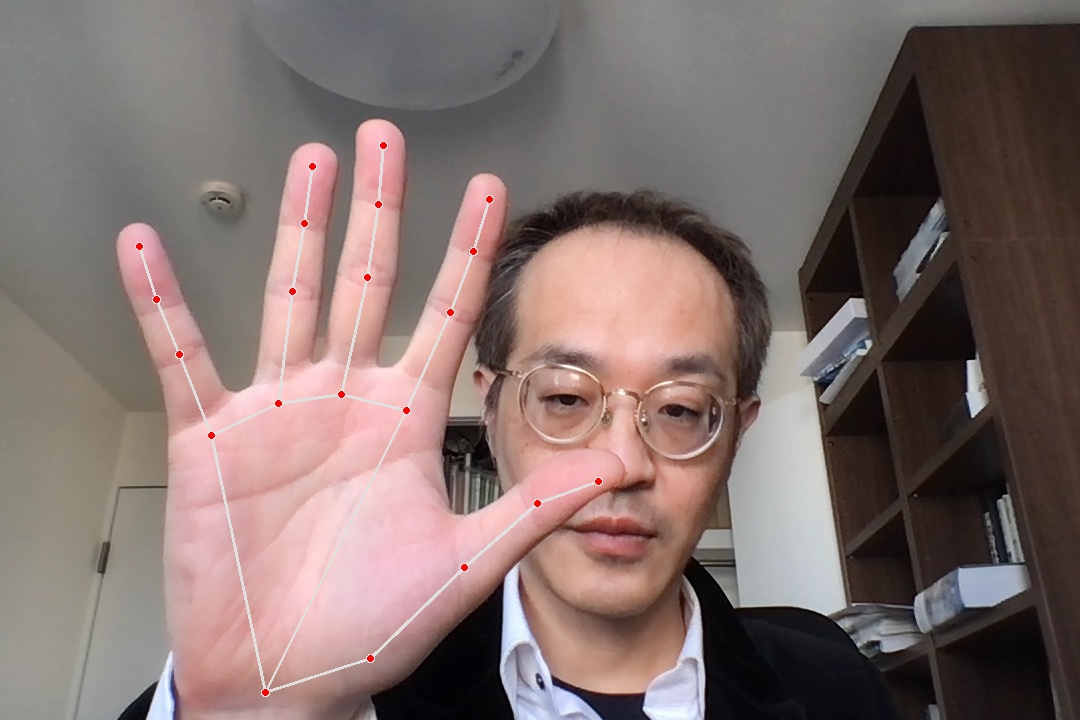

In [45]:
from google.colab import files
from IPython.display import Image
import cv2
import mediapipe as mp
import numpy as np
import os

files = files.upload()
file_name = list(files.keys())[0]

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
holistic=mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5)


img = cv2.imread(file_name)
result = holistic.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
handpose=np.array([])
for tmp in result.right_hand_landmarks.landmark:
  handpose=np.append(handpose,tmp.x)
  handpose=np.append(handpose,tmp.y)
  handpose=np.append(handpose,tmp.z)

# 特徴量の表示
outputfilename='/content/drive/MyDrive/ユニークAIシステム構築道場/MediaPipe/tmp.jpg'
annotated_image = img.copy()
mp_drawing.draw_landmarks(annotated_image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
cv2.imwrite(outputfilename, annotated_image)

# グーかチョキかパーかを推定
y_res=model.predict([handpose])
result_label = le.inverse_transform(y_res)[0]

print('----------------------------------')
print('Recognition Result')
print(result_label)

Image(outputfilename, format='jpg')

In [46]:
handpose

array([ 2.45538309e-01,  9.61713612e-01,  5.89034300e-07,  3.43071580e-01,
        9.15135086e-01, -3.40473056e-02,  4.30358499e-01,  7.87868023e-01,
       -4.20309156e-02,  4.97252882e-01,  6.99499667e-01, -4.93926257e-02,
        5.54492712e-01,  6.68266058e-01, -5.64629100e-02,  3.76048356e-01,
        5.69912732e-01, -1.07206861e-02,  4.16749477e-01,  4.33773011e-01,
       -2.49445364e-02,  4.38091755e-01,  3.49709332e-01, -4.14035656e-02,
        4.53092158e-01,  2.77249694e-01, -5.63129745e-02,  3.16041052e-01,
        5.47311902e-01, -1.54607603e-02,  3.40113193e-01,  3.85128349e-01,
       -2.76182536e-02,  3.50525409e-01,  2.84544736e-01, -4.49295081e-02,
        3.55396628e-01,  2.02229261e-01, -5.93114309e-02,  2.57622480e-01,
        5.60175121e-01, -2.63336841e-02,  2.71164775e-01,  4.05230820e-01,
       -4.61522490e-02,  2.82096654e-01,  3.10707450e-01, -6.81907460e-02,
        2.89411724e-01,  2.31443912e-01, -8.45346972e-02,  1.95643485e-01,
        6.04778945e-01, -